### Import Library

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
tuning = pd.read_csv('hasiltuning/hasiltuning.csv')
tuning

,hidden_layer,hidden_neuron,aktivasi,lr,epoch,mse,bobot,bias,bobot_output,bias_output,mse_list
0,1,"(2,)",relu,0.0001,100,0.024535,"[[[np.float64(-0.38295019123848234), np.float6...","[[0.3299464457521193, np.float64(-1.1693792781...","[np.float64(0.845183068675232), np.float64(0.7...",0.797069,"[np.float64(7.242100421355892), np.float64(0.0..."
1,1,"(2,)",relu,0.0001,200,0.003287,"[[[np.float64(0.07819967313010265), np.float64...","[[0.3542217699460102, np.float64(-0.1317835384...","[np.float64(0.8664977301283041), np.float64(0....",0.288217,"[np.float64(2.1174398945506683), np.float64(0...."
2,1,"(2,)",relu,0.0010,100,0.026721,"[[[np.float64(-3.964121376186635), np.float64(...","[[0.9522725220199975, np.float64(-7.3838789871...","[np.float64(0.5277884692762436), np.float64(0....",0.580078,"[np.float64(5.297540004058864), np.float64(0.0..."
3,1,"(2,)",relu,0.0010,200,0.002764,"[[[np.float64(-2.021567071519746), np.float64(...","[[0.6802813286690749, np.float64(2.21746478302...","[np.float64(0.8799185336017036), np.float64(0....",0.095224,"[np.float64(0.4997634461287974), np.float64(0...."
4,1,"(2,)",sigmoid,0.0001,100,0.049986,"[[[np.float64(0.42355222612704624), np.float64...","[[0.9817348891179016, np.float64(0.18440748301...","[np.float64(0.9516302834802354), np.float64(0....",0.853644,"[np.float64(0.05351162841010797), np.float64(0..."
...,...,...,...,...,...,...,...,...,...,...,...
139,2,"(4, 4)",sigmoid,0.0010,200,0.012955,"[[[np.float64(0.4895899205484131), np.float64(...","[[0.28425252100860066, 0.4187918290331676, 0.6...","[np.float64(0.70064457567569), np.float64(0.75...",0.087045,"[np.float64(0.044883246409727434), np.float64(..."
140,2,"(4, 4)",tanh,0.0001,100,0.014272,"[[[np.float64(0.23293874883182497), np.float64...","[[0.7440385779764161, 0.8817407930891147, 0.25...","[np.float64(0.3115807691834987), np.float64(0....",0.116837,"[np.float64(0.08193289374341417), np.float64(0..."
141,2,"(4, 4)",tanh,0.0001,200,0.011599,"[[[np.float64(-0.08352440194539089), np.float6...","[[0.352609395936058, 0.14328598224153577, 0.11...","[np.float64(0.4436583701656586), np.float64(0....",0.339171,"[np.float64(0.08415679474295315), np.float64(0..."
142,2,"(4, 4)",tanh,0.0010,100,0.011107,"[[[np.float64(0.9252077790999627), np.float64(...","[[0.46465202830533103, 0.30829442214284675, 0....","[np.float64(0.6500410462726692), np.float64(0....",0.676856,"[np.float64(0.09135671464690627), np.float64(0..."


In [3]:
X_test = pd.read_csv('dataset/X_test.csv').values
X_test

array([[0.72924046, 0.78047824, 0.77438659, 0.37263913],
       [0.66017316, 0.5876127 , 0.6888091 , 0.28629199],
       [0.50314837, 0.29086633, 0.48473968, 0.06663297],
       ...,
       [0.75816608, 0.77224618, 0.77558348, 0.45094435],
       [0.5733963 , 0.4880439 , 0.76181927, 0.37314462],
       [0.64285714, 0.46961976, 0.71813285, 0.29001425]])

In [4]:
y_test = pd.read_csv('dataset/y_test.csv').values
y_test

array([[0.8115351 ],
       [0.70841829],
       [0.42805127],
       [0.54631518],
       [0.67040489],
       [0.83236237],
       [0.69967958],
       [0.63180891],
       [0.68948442],
       [0.6307894 ],
       [0.90940868],
       [0.55257792],
       [0.52665307],
       [0.77468686],
       [0.68933877],
       [0.5576755 ],
       [0.64797553],
       [0.48762016],
       [0.87110399],
       [0.76696767],
       [0.68700845],
       [0.70128168],
       [0.69851442],
       [0.73026507],
       [0.64156714],
       [0.73565395],
       [0.65452957],
       [0.6427323 ],
       [0.72473056],
       [0.56918147],
       [0.60602971],
       [0.76565686],
       [0.61141858],
       [0.79230993],
       [0.81794349],
       [0.93955724],
       [0.66239441],
       [0.65117973],
       [0.69866006],
       [0.68642587],
       [0.61112729],
       [0.72429362],
       [0.58068745],
       [0.80847655],
       [0.77119138],
       [0.6974949 ],
       [0.62875036],
       [0.800

##### Fungsi aktivasi

In [5]:
def aktivasiX(activ, x): 
    # aktivasi relu
    if activ == 'relu':
        if x >= 0:
            return x
        else:
            return 0
    # aktivasi sigmoid
    elif activ == 'sigmoid':
        return 1 / (1 + math.exp(-x))
    # aktivasi softmax
    elif activ == 'softmax':
        return 1
    # aktivasi tanh
    else:
        return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def turunanaktivasiX(activ, x): 
    # turunan aktivasi relu
    if activ == 'relu':
        if x > 0:
            return 1
        else:
            return 0
    # turunan aktivasi sigmoid
    elif activ == 'sigmoid':
        sig = 1 / (1 + math.exp(-x))
        return sig * (1 - sig)
    # turunan aktivasi softmax
    elif activ == 'softmax':
        return 0
    # turunan aktivasi tanh
    else:
        tan = (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))
        return 1 - (tan) ** 2

##### Best parameter

In [6]:
best_index = tuning['mse'].idxmin()
best_hidden_layer_global = tuning['hidden_layer'][best_index]
best_hidden_neuron_global = tuning['hidden_neuron'][best_index]
best_aktivasi_global = tuning['aktivasi'][best_index]
best_lr_global = tuning['lr'][best_index]
best_epoch_global = tuning['epoch'][best_index]
best_mse_global = tuning['mse'][best_index]
best_bobot_global = tuning['bobot'][best_index]
best_bias_global = tuning['bias'][best_index]
best_bobot_output_global = tuning['bobot_output'][best_index]
best_bias_output_global = tuning['bias_output'][best_index]

print("Best Index:", best_index)
print("Best Hidden Layer:", best_hidden_layer_global)
print("Best Hidden Neuron:", best_hidden_neuron_global)
print("Best Aktivasi:", best_aktivasi_global)
print("Best Learning Rate:", best_lr_global)
print("Best Epoch:", best_epoch_global)
print("Best MSE:", best_mse_global)
print("Best Bobot:", best_bobot_global)
print("Best Bias:", best_bias_global)
print("Best Bobot Output:", best_bobot_output_global)
print("Best Bias Output:", best_bias_output_global)

Best Index: 97
Best Hidden Layer: 2
Best Hidden Neuron: (3, 4)
Best Aktivasi: relu
Best Learning Rate: 0.0001
Best Epoch: 200
Best MSE: 0.0005849390439398
Best Bobot: [[[np.float64(0.4237684362601328), np.float64(1.6382778808636556), np.float64(-1.0582985212830653)], [np.float64(0.0426411212924624), np.float64(1.6051587324801961), np.float64(-1.1473723993270275)], [np.float64(0.004418257031662063), np.float64(1.6300799185301298), np.float64(-1.4695992869931536)], [np.float64(0.23565072296080217), np.float64(0.8154666075027731), np.float64(0.06589019971757329)]], [[np.float64(1.0965253175141063), np.float64(-2.133891339829824), np.float64(-1.2803470547855516), np.float64(-2.444537919128476)], [np.float64(2.8893425287144705), np.float64(-2.304382906421307), np.float64(-1.6570863500396003), np.float64(-3.1965438705551406)], [np.float64(0.537171327488207), np.float64(-0.6684793895124915), np.float64(-0.9051322150871794), np.float64(-1.0074228003237824)]]]
Best Bias: [[0.9924060121392778, 0

##### Mengembalikan menjadi list

In [7]:
best_bobot_global = eval(best_bobot_global)
best_bias_global = eval(best_bias_global)
best_bobot_output_global = eval(best_bobot_output_global)

### Prediksi X_test

##### Fungsi prediksi X_test

In [8]:
def predict(X_test, y_test, bobot, bias, bobot_output, bias_output, aktivasi):
    prediksi = []
    error = []
    aktual = []
    for i in range(len(X_test)):
        # FEEDFORWARD
        # Operasi pada Hidden Layer
        aktivasi_hidden = []
        for j in range(len(bobot)):  # untuk setiap hidden layer
            aktivasi_hidden_temp = []
            for k in range(len(bobot[j][0])):  # jumlah neuron di hidden layer
                sumXbobot = 0
                if j == 0:  # layer pertama
                    for l in range(4):  # jumlah neuron input
                        sumXbobot += bobot[j][l][k] * X_test[i][l]
                else:
                    for l in range(len(aktivasi_hidden[j - 1])):
                        sumXbobot += bobot[j][l][k] * aktivasi_hidden[j - 1][l]
                sumXbobotbias = bias[j][k] + sumXbobot
                aktivasi_hidden_temp.append(aktivasiX(aktivasi, sumXbobotbias))
            aktivasi_hidden.append(aktivasi_hidden_temp)

        # Operasi pada Output Layer
        sumZbobotoutput = 0
        for j in range(len(aktivasi_hidden[-1])):
            sumZbobotoutput += bobot_output[j] * aktivasi_hidden[-1][j]
        sumZbobotoutput_biasoutput = bias_output + sumZbobotoutput
        predik = aktivasiX(aktivasi, sumZbobotoutput_biasoutput)
        prediksi.append(predik)
        error.append(abs(y_test[i][0] - predik))

    return prediksi, error

##### Pemanggilan fungsi prediksi

In [9]:
prediksi, error = predict(X_test, y_test, best_bobot_global, best_bias_global, best_bobot_output_global, best_bias_output_global, best_aktivasi_global)

##### Visualisasi hasil prediksi dan aktual

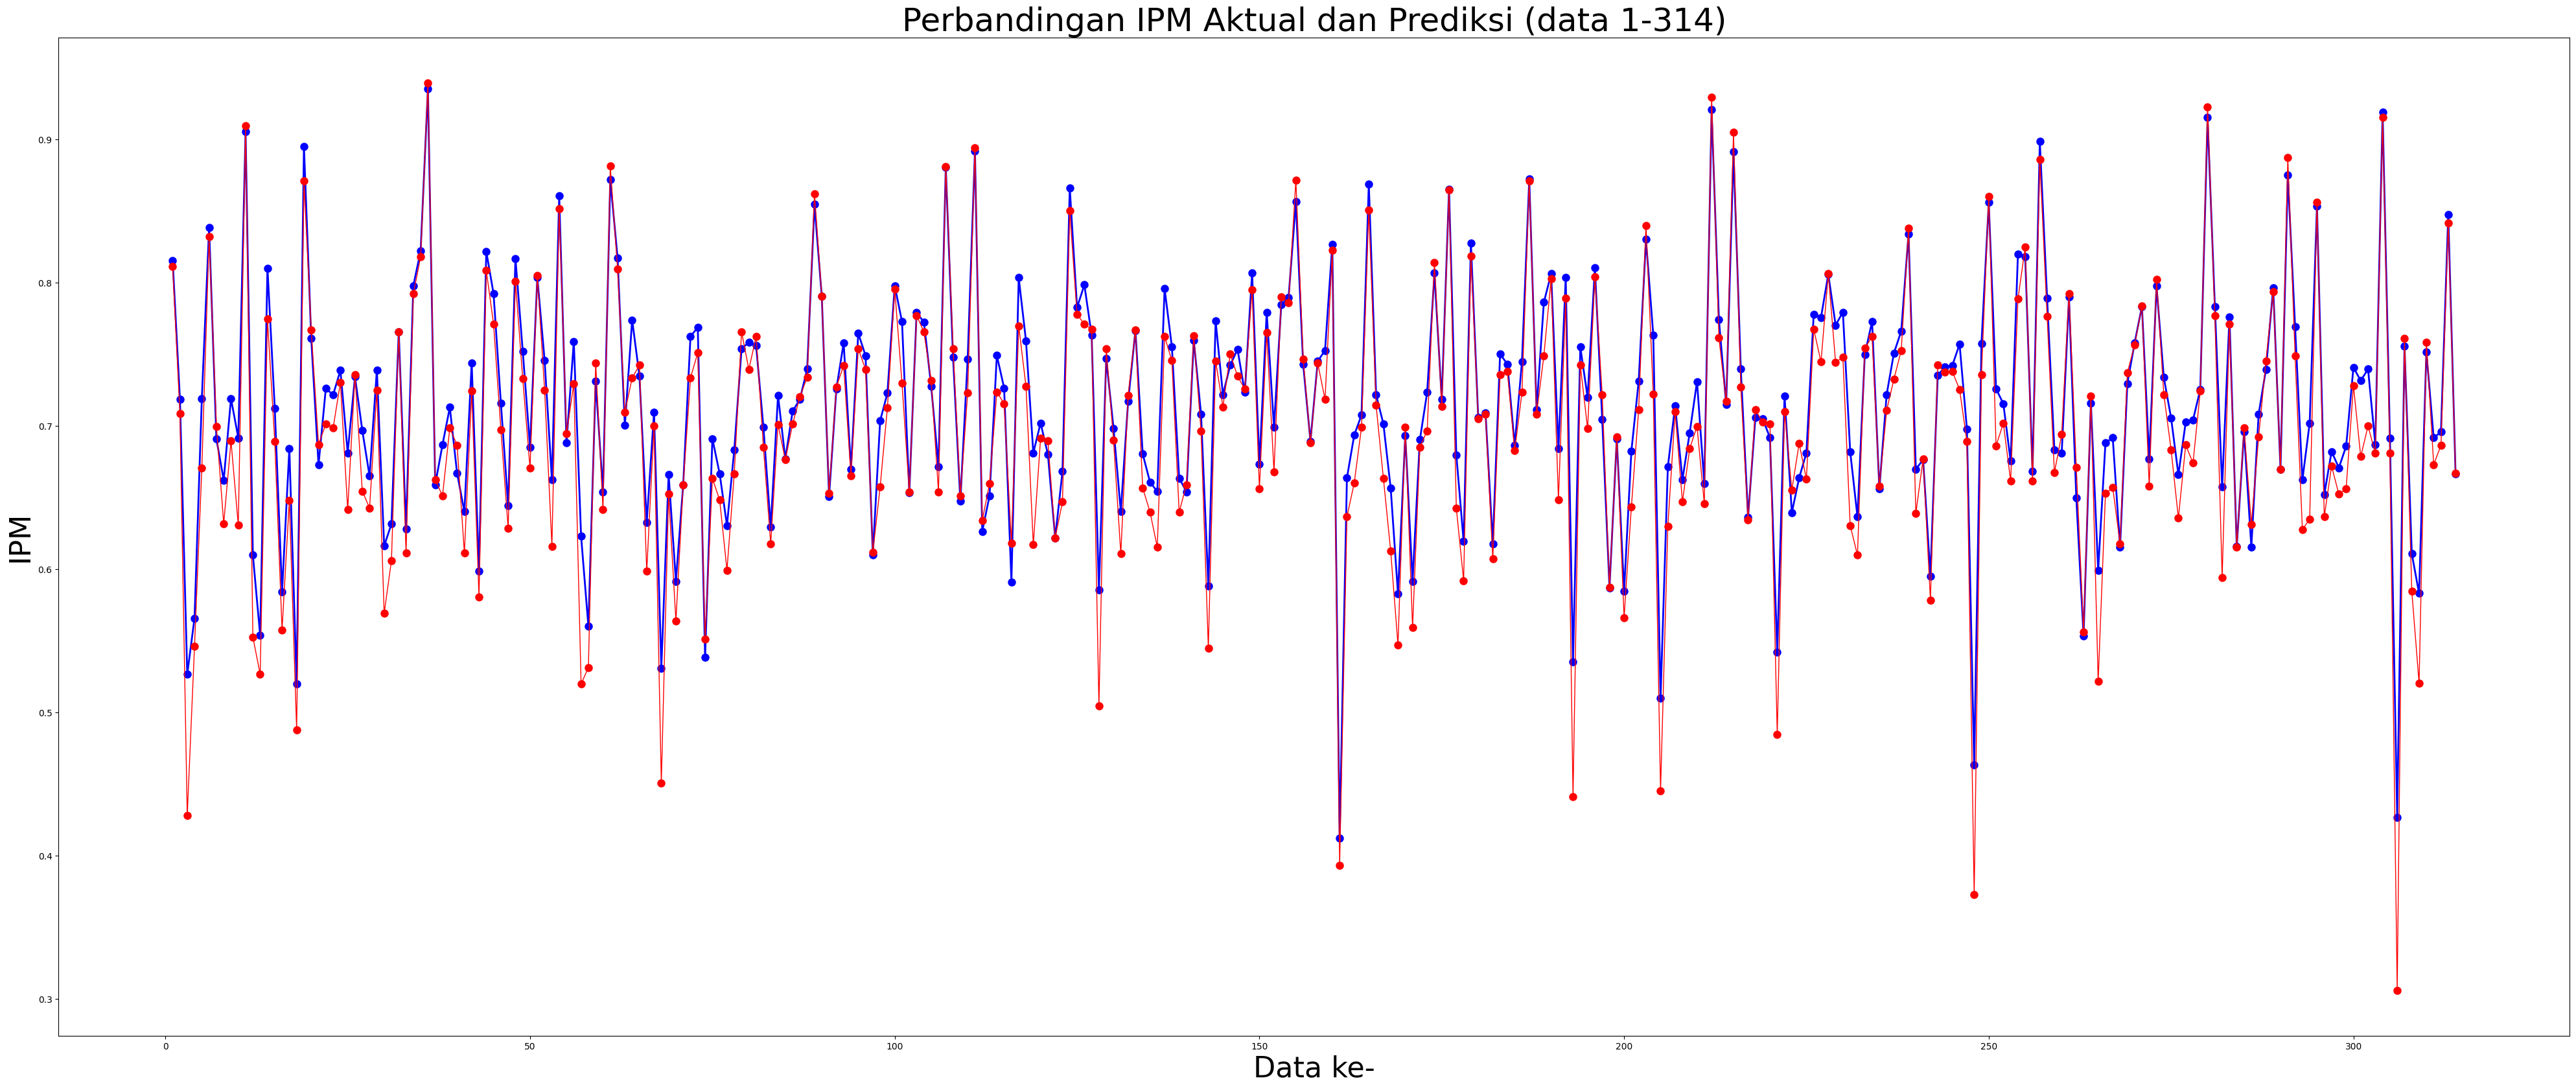

In [10]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, prediksi[:314], label="ipm prediksi", color='blue', linewidth=2, marker='o', markersize=8)
plt.plot(datake, y_test[:314], label="ipm aktual", color='red', linewidth=1, marker='o', markersize=8)
plt.title('Perbandingan IPM Aktual dan Prediksi (data 1-314)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('IPM', fontsize=32)
plt.show()

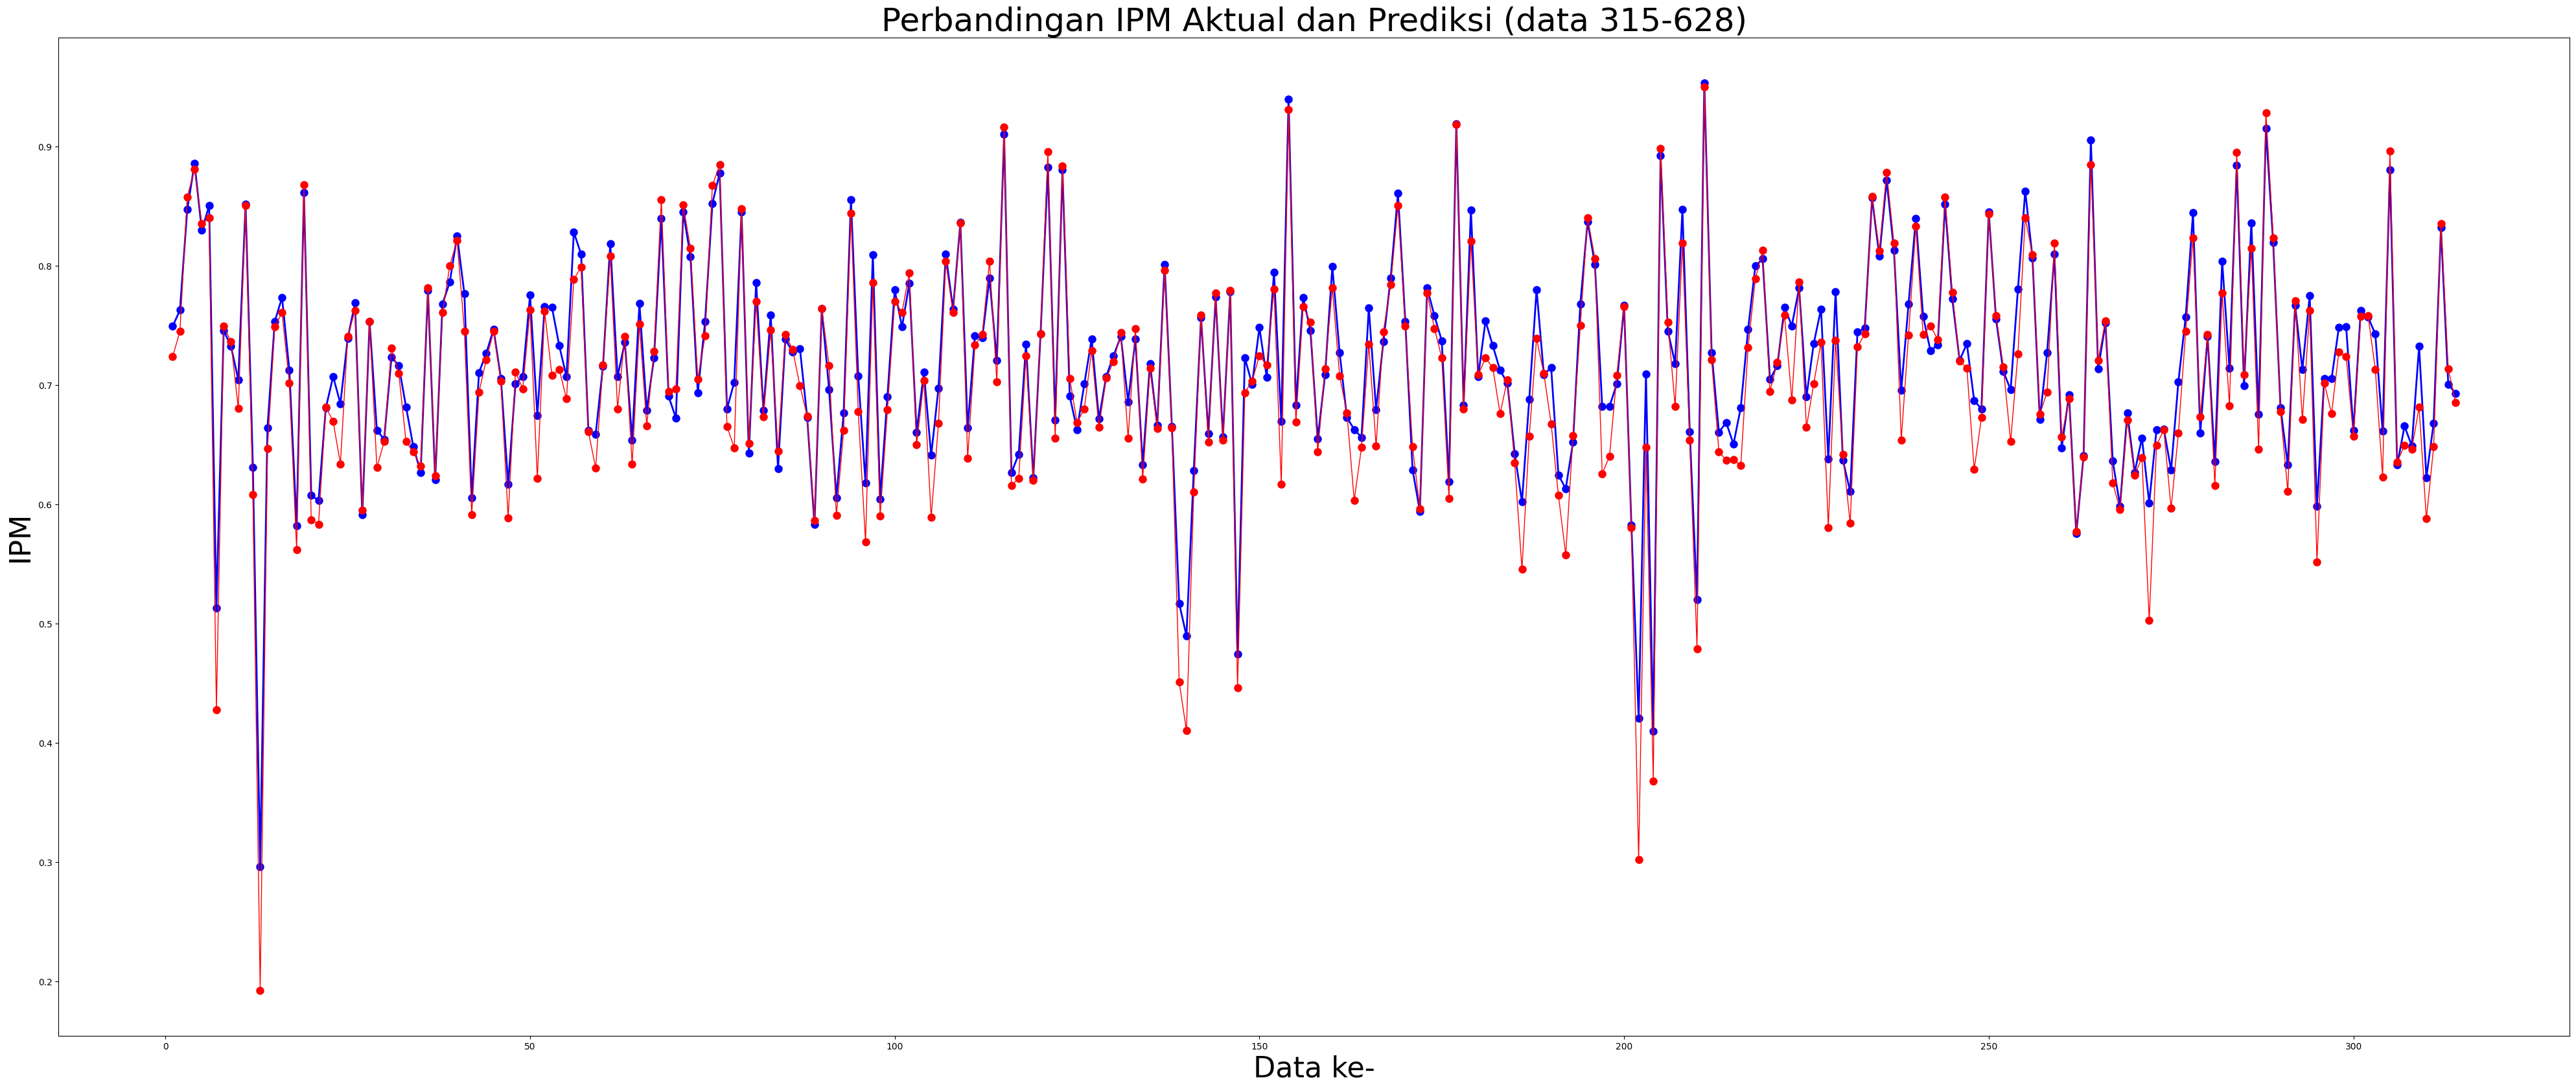

In [11]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, prediksi[314:], label="ipm prediksi", color='blue', linewidth=2, marker='o', markersize=8)
plt.plot(datake, y_test[314:], label="ipm aktual", color='red', linewidth=1, marker='o', markersize=8)
plt.title('Perbandingan IPM Aktual dan Prediksi (data 315-628)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('IPM', fontsize=32)
plt.show()

##### Visualisasi Error

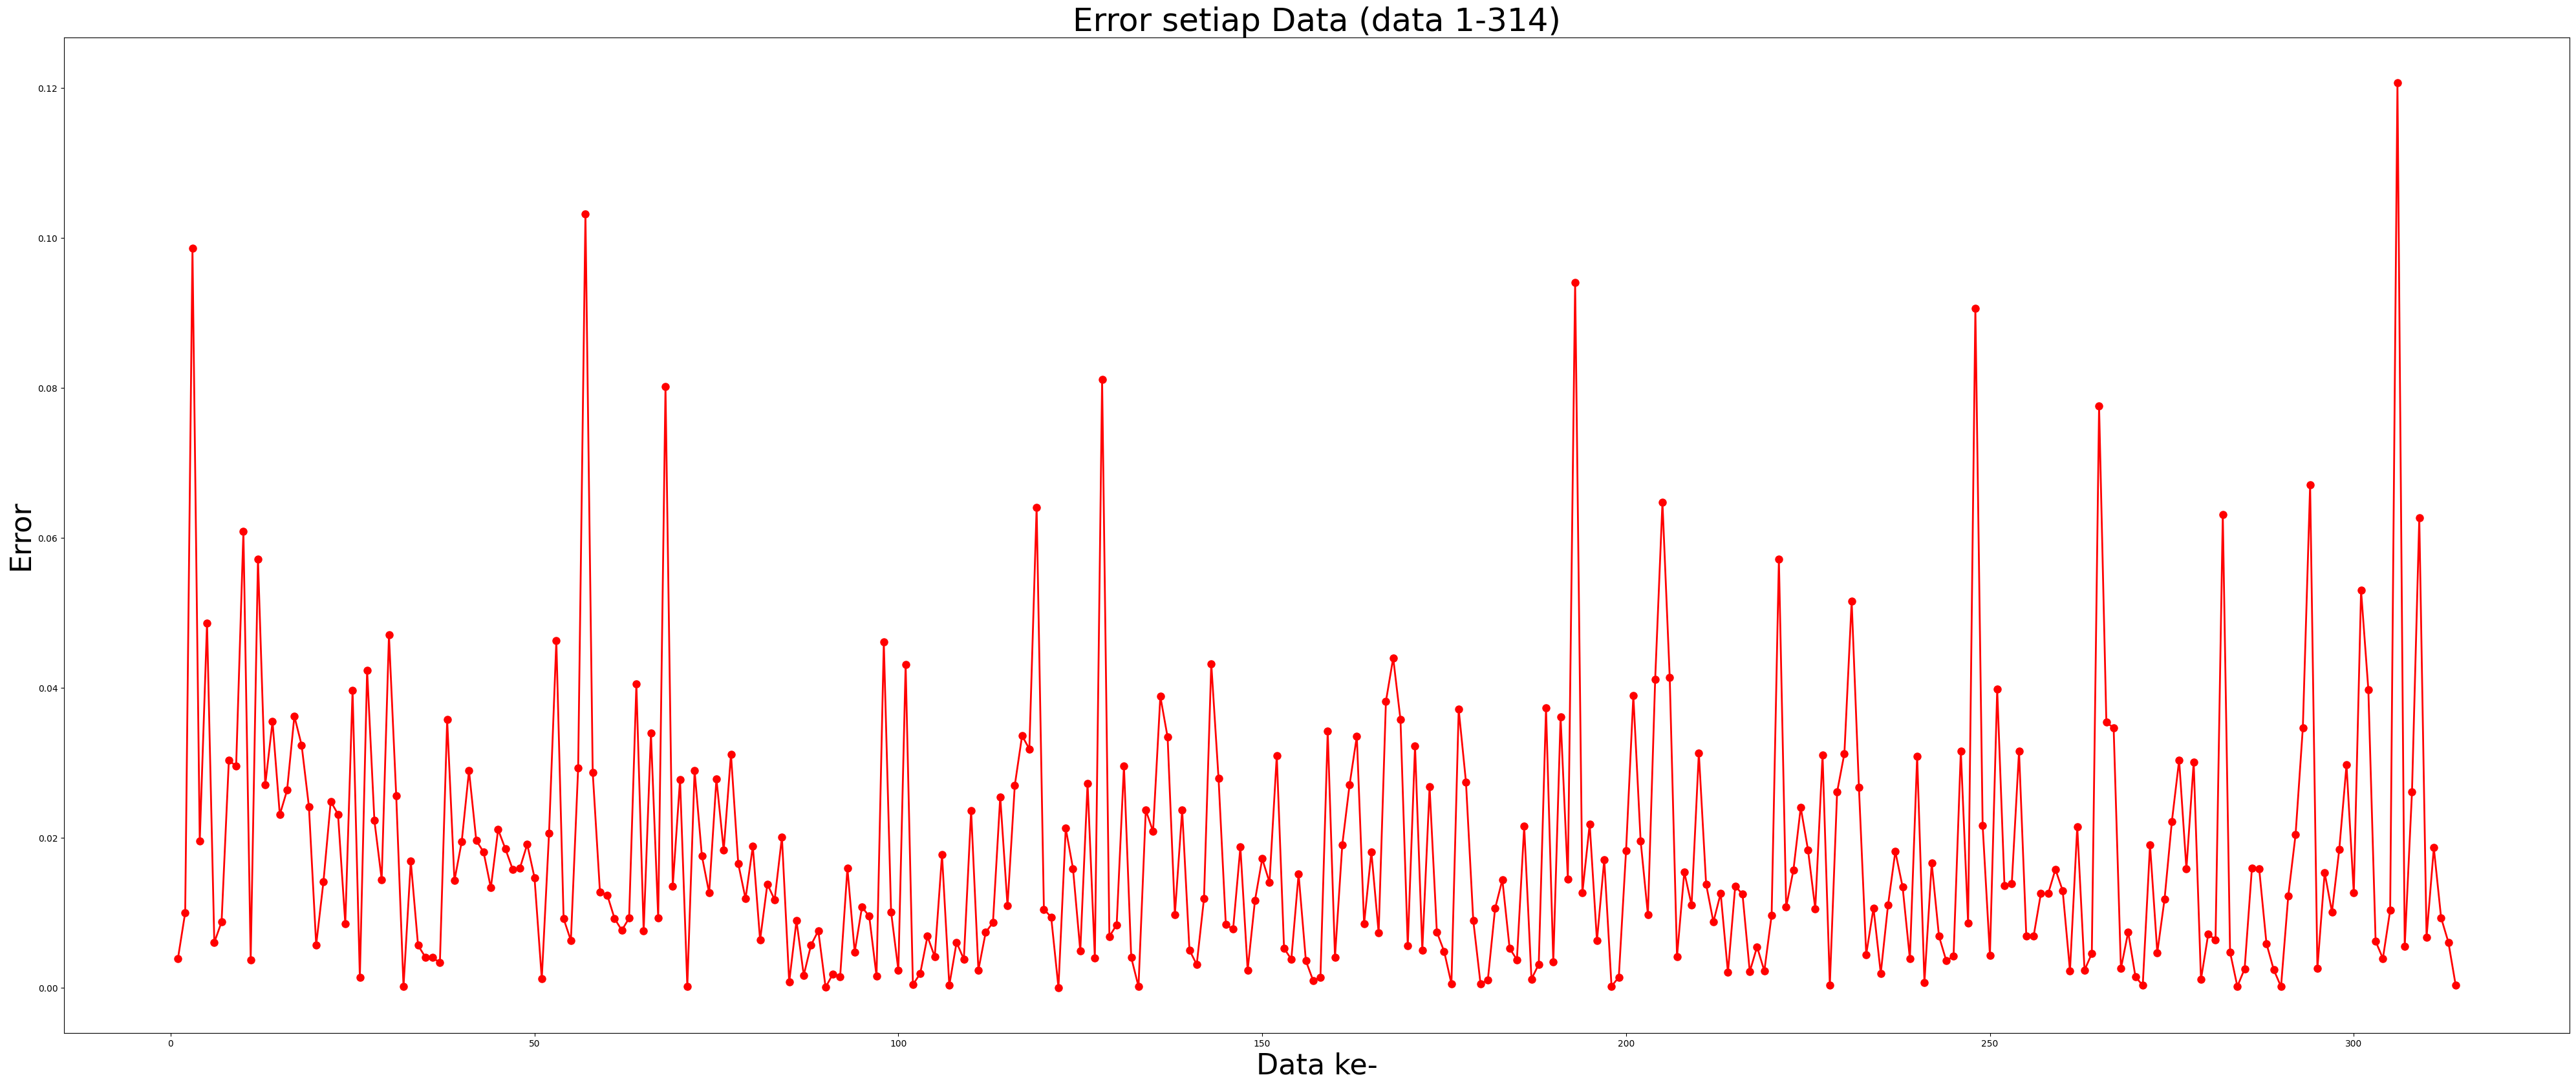

In [12]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, error[:314], label="ipm prediksi", color='red', linewidth=2, marker='o', markersize=8)
plt.title('Error setiap Data (data 1-314)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('Error', fontsize=32)
plt.show()

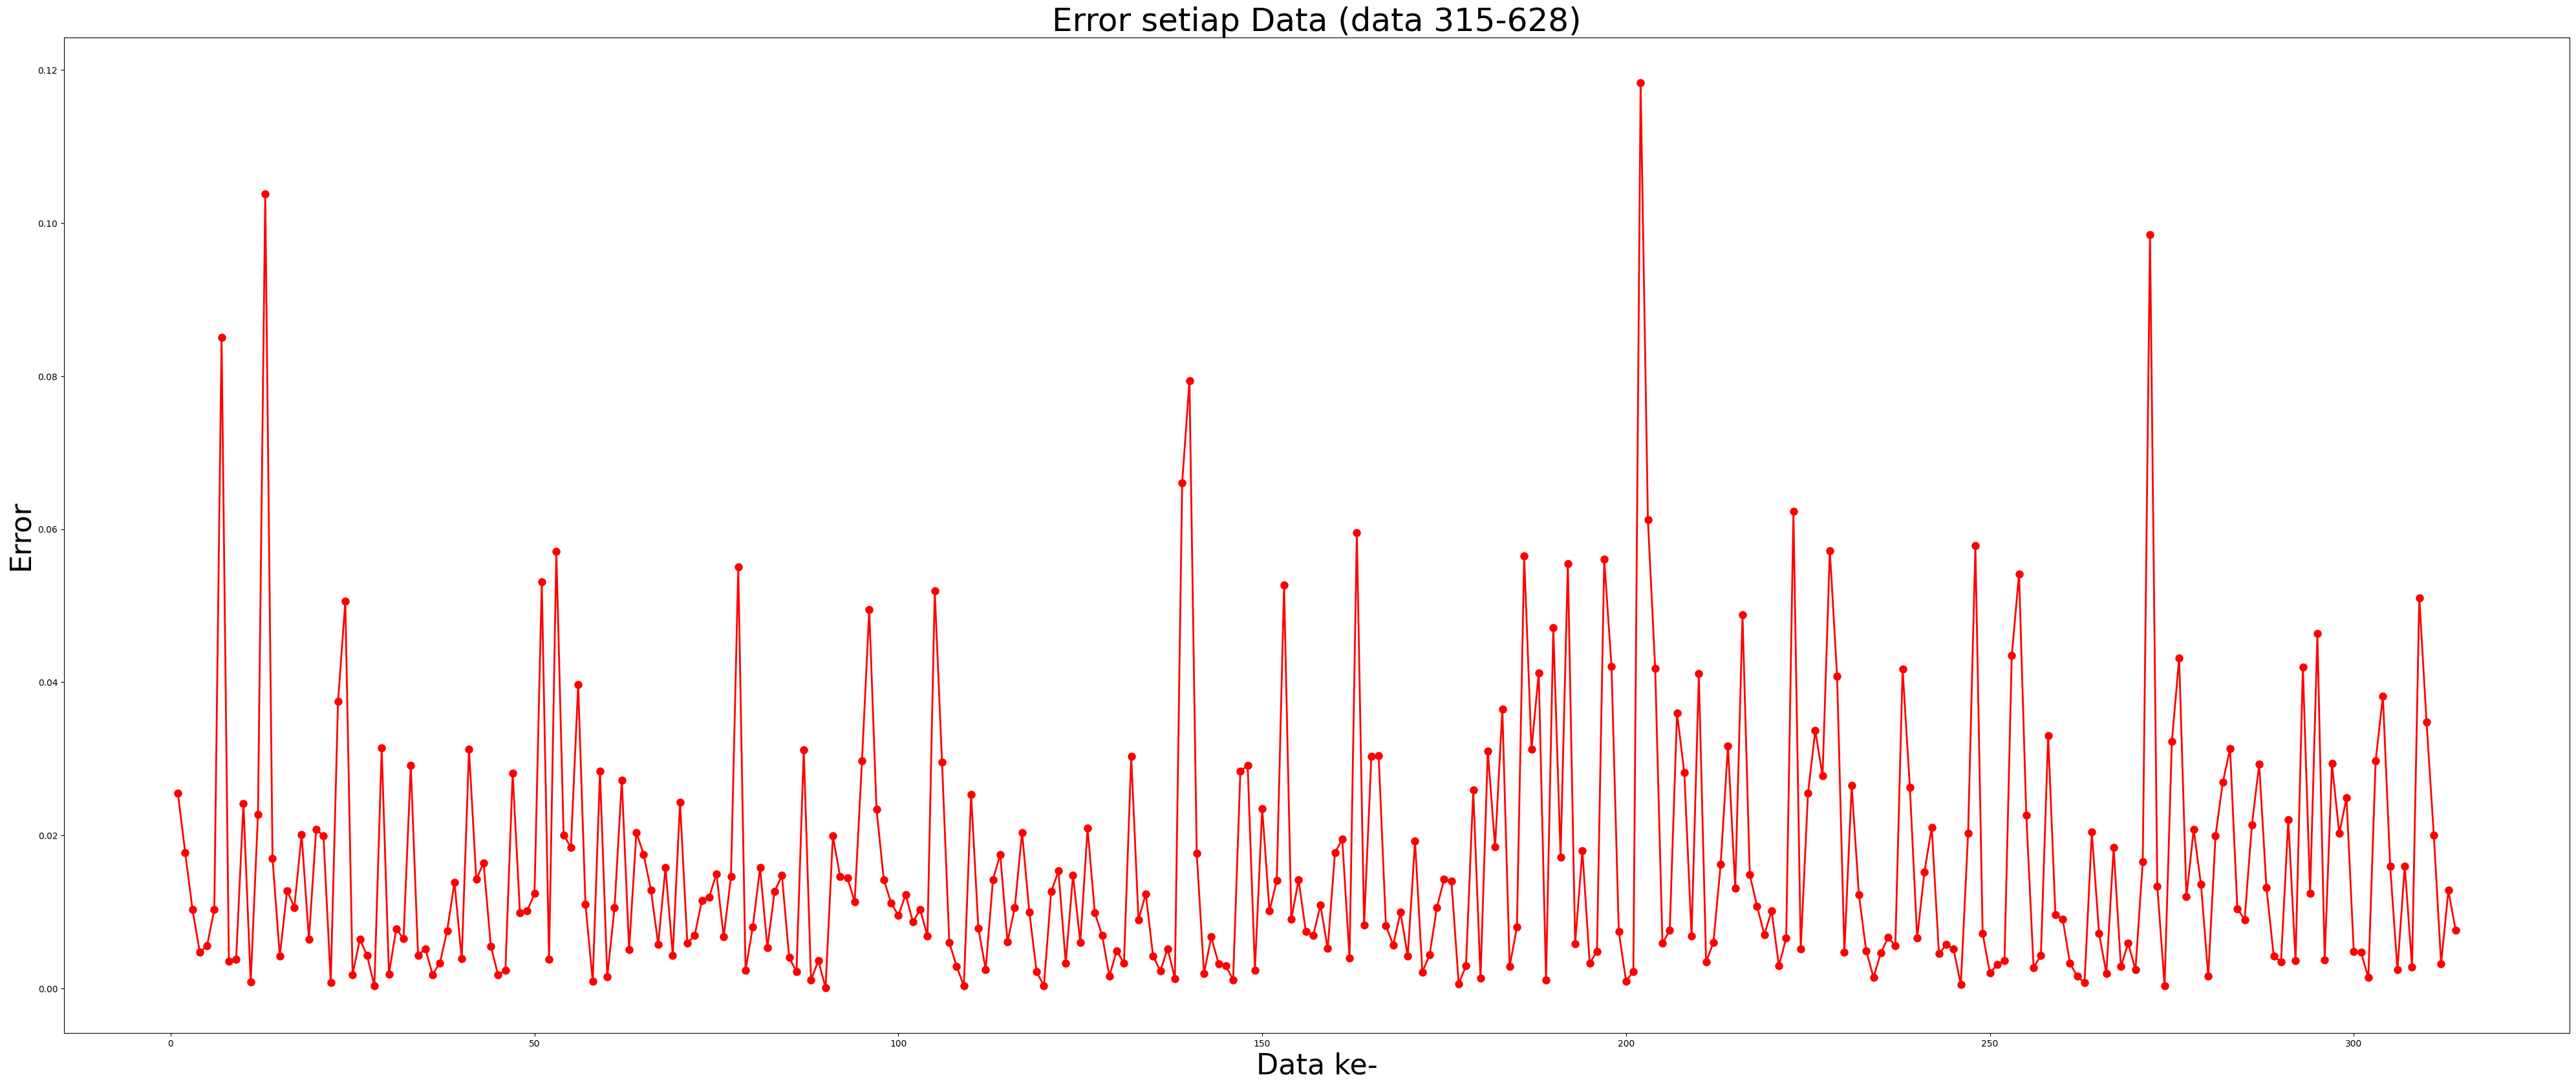

In [13]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, error[314:], label="ipm prediksi", color='red', linewidth=2, marker='o', markersize=8)
plt.title('Error setiap Data (data 315-628)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('Error', fontsize=32)
plt.show()

In [14]:
max_error = max(error)
min_error = min(error)
rerata_error = sum(error) / len(error)
print(f"Maksimal Error: {max_error}")
print(f"Minimal Error: {min_error}")
print(f"Rerata Error: {rerata_error}")

Maksimal Error: 0.12071427198248968
Minimal Error: 4.324567288527259e-05
Rerata Error: 0.017817494404152083


In [15]:
for i in range(len(y_test)):
    print(f"Aktual: {y_test[i][0]} - Prediksi: {prediksi[i]}")

Aktual: 0.8115351004951937 - Prediksi: 0.8154270120886784
Aktual: 0.7084182930381591 - Prediksi: 0.7184672753630053
Aktual: 0.4280512671133119 - Prediksi: 0.5266332871619523
Aktual: 0.546315176230702 - Prediksi: 0.5658575341791345
Aktual: 0.670404893678998 - Prediksi: 0.7190619902242382
Aktual: 0.8323623652781823 - Prediksi: 0.8384190316828887
Aktual: 0.6996795805418001 - Prediksi: 0.6908840771459069
Aktual: 0.6318089134867463 - Prediksi: 0.6621795435241312
Aktual: 0.6894844159627147 - Prediksi: 0.719036612363861
Aktual: 0.6307893970288377 - Prediksi: 0.691656497347538
Aktual: 0.9094086804544133 - Prediksi: 0.9056648348699592
Aktual: 0.5525779201864259 - Prediksi: 0.609779895705257
Aktual: 0.5266530731138945 - Prediksi: 0.5537107096293432
Aktual: 0.7746868628022138 - Prediksi: 0.8102169005429496
Aktual: 0.6893387707544422 - Prediksi: 0.712433129271876
Aktual: 0.5576755024759685 - Prediksi: 0.5840274457803796
Aktual: 0.6479755316050102 - Prediksi: 0.6842015638877176
Aktual: 0.4876201572